In [128]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image

import urllib.request as request 
from matplotlib import pyplot as plt

import torch.nn as nn
import torch.optim as optim

import numpy as np

# NO CIFAR10, con el fin de crear TRES clasificadores dicótomicos. Capases de recibir datos o imágenes(URL) externos. (se comprobara con datos su efectividad)

---



---



In [100]:
data_path = 'data/'
full_data_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

full_validation_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

Extracting data/cifar-100-python.tar.gz to data/
Files already downloaded and verified


In [101]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tulip
skyscraper
poppy
tiger


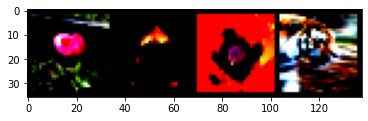

In [126]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))
for i in range(size):
  print(classes[labels[i]])

In [127]:
class_names = ['bed ', 'bee','beetle']
label_map = {5:0, 6:1, 7:2}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [5, 6, 7]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [5, 6, 7]]


In [104]:
img, label = data_set[100]
img.shape

torch.Size([3, 32, 32])

In [105]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [106]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'beetle'

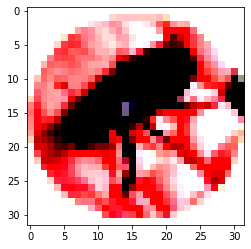

In [125]:
# observa que es una botella
img, label = data_set[200]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [108]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4796, 0.5204]], grad_fn=<SoftmaxBackward>)

In [109]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> beetle model: bee


In [110]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.Softmax(dim=1)
    )
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bed '

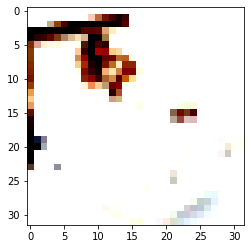

In [111]:
img, label = data_set[120]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [112]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], 'model:',class_names[index])

tensor([[0.2885, 0.4422, 0.2692]], grad_fn=<SoftmaxBackward>)
-> bed  model: bee


In [113]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 4.099543
Epoch: 1, Loss: 3.701571
Epoch: 2, Loss: 3.721150
Epoch: 3, Loss: 2.034608
Epoch: 4, Loss: 5.441163


In [114]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 200
for epoch in range (n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.752977
Epoch: 1, Loss: 0.788798
Epoch: 2, Loss: 0.860636
Epoch: 3, Loss: 0.653742
Epoch: 4, Loss: 0.580820
Epoch: 5, Loss: 0.585281
Epoch: 6, Loss: 0.466544
Epoch: 7, Loss: 0.530387
Epoch: 8, Loss: 0.505199
Epoch: 9, Loss: 0.448364
Epoch: 10, Loss: 0.781843
Epoch: 11, Loss: 0.826173
Epoch: 12, Loss: 0.615828
Epoch: 13, Loss: 0.542307
Epoch: 14, Loss: 0.511280
Epoch: 15, Loss: 0.531754
Epoch: 16, Loss: 0.386448
Epoch: 17, Loss: 0.408525
Epoch: 18, Loss: 0.589552
Epoch: 19, Loss: 0.457574
Epoch: 20, Loss: 0.487852
Epoch: 21, Loss: 0.315965
Epoch: 22, Loss: 0.352139
Epoch: 23, Loss: 0.411905
Epoch: 24, Loss: 0.682912
Epoch: 25, Loss: 0.225520
Epoch: 26, Loss: 0.354042
Epoch: 27, Loss: 0.209159
Epoch: 28, Loss: 0.326005
Epoch: 29, Loss: 0.440363
Epoch: 30, Loss: 0.243389
Epoch: 31, Loss: 0.194591
Epoch: 32, Loss: 0.226838
Epoch: 33, Loss: 0.250410
Epoch: 34, Loss: 0.456055
Epoch: 35, Loss: 0.355843
Epoch: 36, Loss: 0.247859
Epoch: 37, Loss: 0.372992
Epoch: 38, Loss: 0.309

In [115]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  beetle  model: beetle


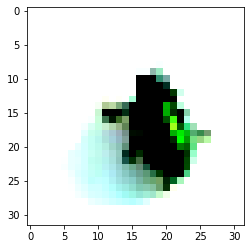

In [116]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [117]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 3)
    )
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 99, Loss: 0.006735


In [118]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


In [119]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

3836163

Correct bed:  model: bed 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


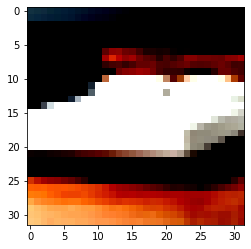

In [120]:
# reconoce el modelo de la imagen que es una cama 
url = 'https://cb2.scene7.com/is/image/CB2/DondraBedQueenSHS16_1x1/?$web_zoom$&190905020920&wid=450&hei=450'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2470, 0.2435, 0.2616]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct bed: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

# Utilizar una inteligencia artificial entrenada de clasificación, e incorporar 3 datos que los pueda clasificar y 1 datos que no pueda clasificar:

---



---



In [81]:
alexnet = models.alexnet(pretrained=True)

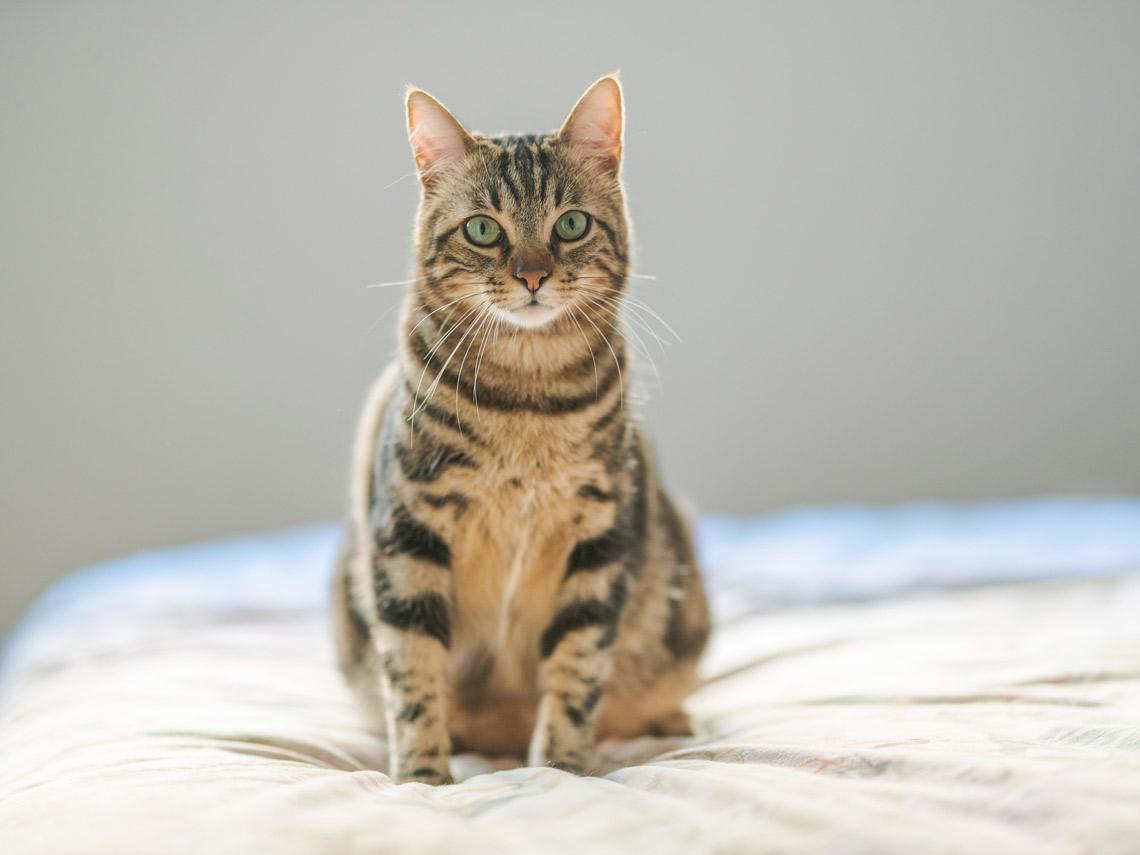

In [82]:
urls = [
        'https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/594a1ced5bafe85dfd3c9869/gato-romano_0.jpg',
        'https://woodgreen.org.uk/image/image/image/V8Iw3SL87ubcIekoP1DmmhekPFXPNbBL5yB4JpVR.jpeg?w=800&h=422&fit=crop-center',
        'https://www.caracteristicas.co/wp-content/uploads/2016/07/buho-1-e1560041732493.jpg',
        'https://st2.depositphotos.com/1806346/6136/i/600/depositphotos_61362761-stock-photo-dog-dressed-like-a-flower.jpg'
]


image = request.urlretrieve(urls[0], "test.jpg")
image2 = request.urlretrieve(urls[1], "test2.jpg")
image3 = request.urlretrieve(urls[2], "test3.jpg")
image4 = request.urlretrieve(urls[3], "test4.jpg")

img=Image.open(image[0])
img2=Image.open(image2[0])
img3=Image.open(image3[0])
img4=Image.open(image4[0])

img

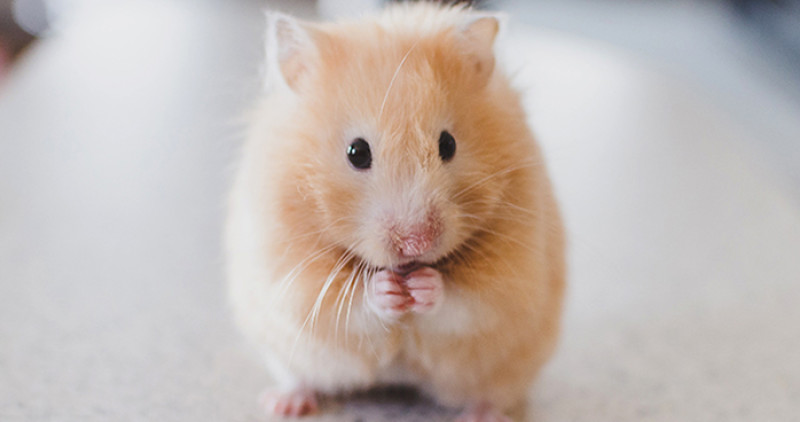

In [83]:
img2

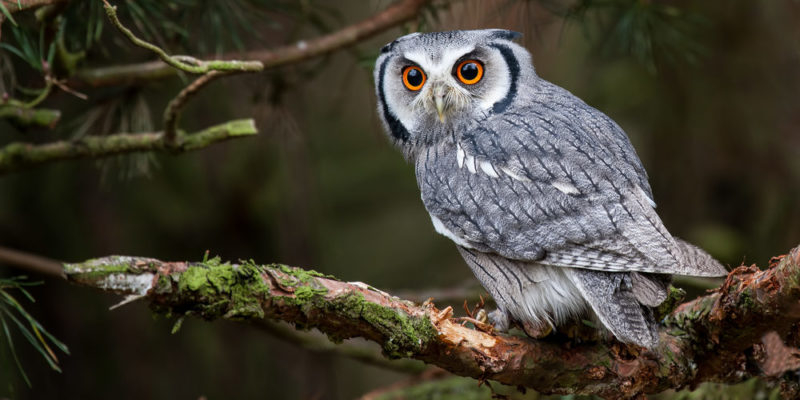

In [84]:
img3

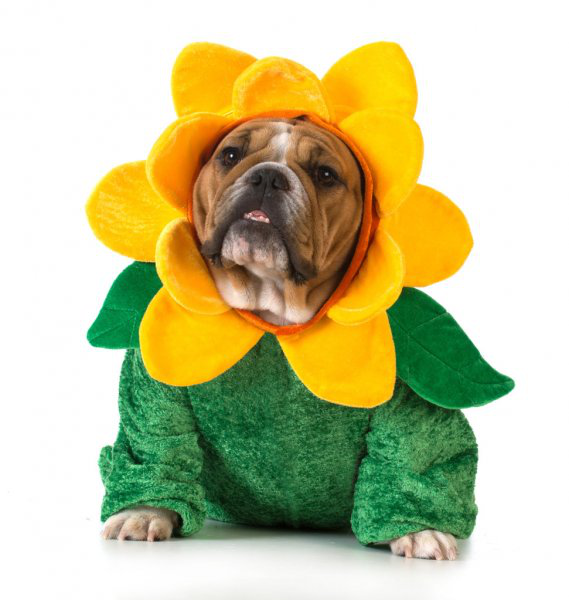

In [85]:
img4

In [86]:
preprocess = transforms.Compose([
  transforms.Resize(399),
  transforms.CenterCrop(299),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485,0.456, 0.406],
      std=[0.229, 0.224, 0.255]
  )                  
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


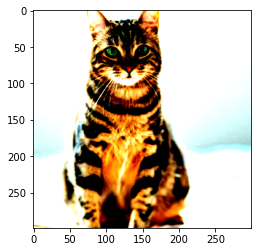

In [87]:
img_t = preprocess(img)
img_t1 = preprocess(img2)
img_t2 = preprocess(img3)
img_t3 = preprocess(img4)

batch = torch.unsqueeze(img_t, 0)
batch1 = torch.unsqueeze(img_t1, 0)
batch2 = torch.unsqueeze(img_t2, 0)
batch3 = torch.unsqueeze(img_t3, 0)

plt.imshow(img_t.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


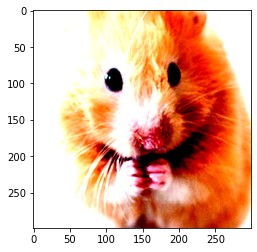

In [88]:
plt.imshow(img_t1.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


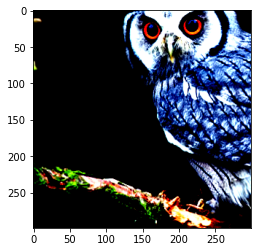

In [89]:
plt.imshow(img_t2.permute(1,2,0))

In [90]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [91]:
out = alexnet(batch)
out1 = alexnet(batch1)
out2 = alexnet(batch2)
out3 = alexnet(batch3)
out

tensor([[-2.4814e+00, -1.4035e+00, -5.5324e+00, -2.7721e+00, -3.0098e+00,
          5.6440e-01, -4.8144e+00, -1.7746e+00,  5.1302e-01,  4.9594e-01,
          6.1316e-01, -1.2430e+00,  7.0221e-01, -1.6813e+00, -2.1694e+00,
         -1.3442e+00, -2.7771e+00, -2.1016e+00, -1.2130e+00, -3.9139e+00,
         -1.7623e+00,  8.3984e-01, -2.0518e+00, -4.6779e-01, -5.3034e-01,
         -4.0677e+00, -5.5453e-01, -3.5342e+00, -1.8126e+00,  1.5197e+00,
         -1.9903e+00, -4.3520e+00, -1.5023e+00, -1.9877e+00, -2.8387e+00,
          8.3439e-02,  3.2844e+00,  3.3694e-01,  1.3559e+00,  2.0512e-02,
         -4.4357e+00,  3.0397e-01, -2.8798e+00, -1.7004e+00,  3.3701e-01,
         -2.1866e-01, -6.2659e-01, -2.3900e+00, -3.4892e+00, -1.8981e+00,
         -2.1785e+00, -2.5869e+00,  9.0674e-01, -1.9409e+00, -2.1345e+00,
         -2.7532e+00,  2.9439e+00, -3.4931e+00, -4.7938e-01, -3.5046e+00,
          1.0907e+00, -1.3630e+00, -1.3297e+00, -1.5509e+00, -1.3056e+00,
         -2.6485e+00,  2.6347e-01, -2.

In [92]:
request.urlretrieve("https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt", "labels.txt")
with open("labels.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [93]:
out

tensor([[-2.4814e+00, -1.4035e+00, -5.5324e+00, -2.7721e+00, -3.0098e+00,
          5.6440e-01, -4.8144e+00, -1.7746e+00,  5.1302e-01,  4.9594e-01,
          6.1316e-01, -1.2430e+00,  7.0221e-01, -1.6813e+00, -2.1694e+00,
         -1.3442e+00, -2.7771e+00, -2.1016e+00, -1.2130e+00, -3.9139e+00,
         -1.7623e+00,  8.3984e-01, -2.0518e+00, -4.6779e-01, -5.3034e-01,
         -4.0677e+00, -5.5453e-01, -3.5342e+00, -1.8126e+00,  1.5197e+00,
         -1.9903e+00, -4.3520e+00, -1.5023e+00, -1.9877e+00, -2.8387e+00,
          8.3439e-02,  3.2844e+00,  3.3694e-01,  1.3559e+00,  2.0512e-02,
         -4.4357e+00,  3.0397e-01, -2.8798e+00, -1.7004e+00,  3.3701e-01,
         -2.1866e-01, -6.2659e-01, -2.3900e+00, -3.4892e+00, -1.8981e+00,
         -2.1785e+00, -2.5869e+00,  9.0674e-01, -1.9409e+00, -2.1345e+00,
         -2.7532e+00,  2.9439e+00, -3.4931e+00, -4.7938e-01, -3.5046e+00,
          1.0907e+00, -1.3630e+00, -1.3297e+00, -1.5509e+00, -1.3056e+00,
         -2.6485e+00,  2.6347e-01, -2.

In [94]:
_, index = torch.max(out, 1)
_, index1 = torch.max(out1, 1)
_, index2 = torch.max(out2, 1)
_, index3 = torch.max(out3, 1)

In [95]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [96]:
# reconoce que es un gato
labels[index[0]], percentage[index[0]].item()

('Egyptian cat', 48.60403060913086)

In [97]:
# reconoce que es un haster

labels[index1[0]], percentage[index1[0]].item()

('hamster', 0.00019066011009272188)

In [98]:
# reconoce que es un buho
labels[index2[0]], percentage[index2[0]].item()

('great grey owl, great gray owl, Strix nebulosa', 7.40667474019574e-06)

In [ ]:
# no reconoce que es perro 
labels[index3[0]], percentage[index3[0]].item()

# Sección nueva

---



---



In [ ]:
tensor_a = torch.Tensor(2,200)
print(tensor_a)
#datos entre el 1 al 2000
tensor_a.uniform_(1,2000)

In [ ]:
tensor_b = torch.Tensor(2,200)
print(tensor_b)
#datos entre el 1 al 2000
tensor_b.uniform_(1,2000)

In [ ]:
plt.scatter(tensor_a,tensor_b)

In [ ]:
TensorA_array = np.array(tensor_a).reshape(-1,1)
TensorB_array = np.array(tensor_b).reshape(-1,1)
TensorA_array, TensorB_array

In [ ]:
precios = torch.from_numpy(TensorA_array).float().requires_grad_(True)
unidades = torch.from_numpy(TensorB_array).float()

precios, precios.shape

nan


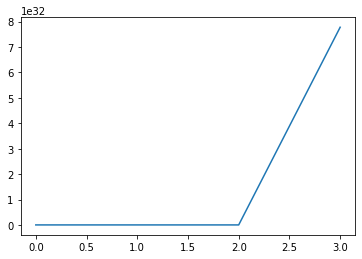

In [166]:
model = nn.Linear(1,1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.0112)

losses = []
iterations = 4000

for i in range(iterations):

  pred = model(precios)
  loss = loss_function(pred, unidades)

  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))

plt.plot(range(iterations),losses)

In [170]:
x = torch.Tensor([[4.0]])
p = model(x)
p 

tensor([[nan]], grad_fn=<AddmmBackward>)

**Regresion Logistica**

---



---



In [ ]:
n = 360

h = n//2

dimen = 2

data = np.random.rand(n, dimen)*10
data

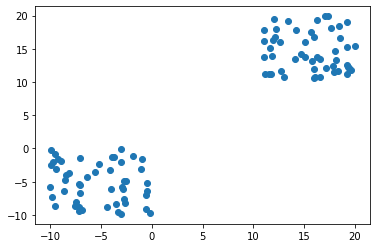

In [158]:
plt.scatter(data[:,0],data[:,1])

In [159]:
data[:h,:] = data[:h, :] -5* np.ones((h, dimen))

In [160]:
data[h:,:] = data[h:, :] +5* np.ones((h, dimen))

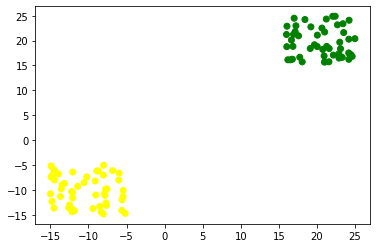

In [161]:
colors = ['yellow', 'green']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)

plt.scatter(data[:,0], data[:, 1], c = color)

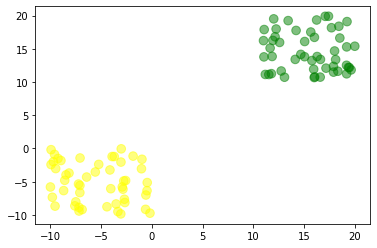

In [153]:
plt.scatter(data[:,0], data[:, 1], c = color, s = 75, alpha=0.5)

In [154]:
target = np.array ([0]*h +[1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.0022, grad_fn=<BinaryCrossEntropyBackward>)

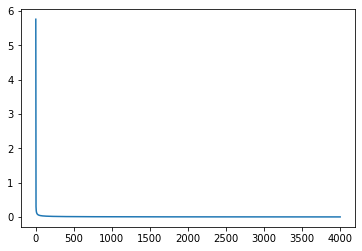

In [155]:
model = nn.Sequential(
           nn.Linear(2,1),
           nn.Sigmoid()
        )

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []

iterations = 4000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [162]:
yellow = torch.Tensor([[0,0]])
prediction = model(yellow)
print(prediction)

prediction = model(yellow).data[0][0] > 0.5
print(colors[prediction])

green = torch.Tensor([[6,6]])
prediction = model(green)
print(prediction)

prediction = model(red).data[0][0] > 0.5
print(color)

tensor([[0.4931]], grad_fn=<SigmoidBackward>)
yellow
tensor([[1.0000]], grad_fn=<SigmoidBackward>)
['yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green']


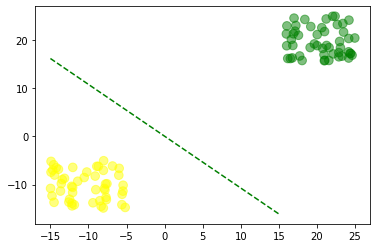

In [163]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.5)

x_axis = np.linspace(-15,15,n)

y_axis = -(w1[0]+ x_axis*w0[0][0]) / w0[0][1]

plt.plot(x_axis, y_axis, 'g--')